In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction import DictVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mutual_info_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/alex/Code/Books-and-Courses/DataTalksClub/ML_Bootcamp/notebooks'

In [3]:
df = pd.read_csv('../data/bank+marketing/bank/bank-full.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Task

In this dataset the target variable is `y` variable - has the client subscribed a term deposit or not.
Dataset preparation

For the rest of the homework, you'll need to use only these columns:

['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 
'pdays', 'previous', 'poutcome', 'y']

In [4]:
keep_columns =  ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 
                 'pdays', 'previous', 'poutcome', 'y']

In [5]:
df = df.filter(keep_columns)

### Task
Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. 
Use train_test_split function for that with random_state=1

In [6]:
df_full_train, df_test = train_test_split(df, test_size=.2, random_state=1)

In [7]:
df_train, df_val = train_test_split(df_full_train, test_size=.25, random_state=1)

### Task

ROC AUC could also be used to evaluate feature importance of numerical variables. Let's do that

    For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
    Use the training dataset for that

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [9]:
df.isna().sum().sum()

np.int64(0)

In [10]:
int64_cols_train = df_train.select_dtypes(['int64']).columns
int64_cols_train

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [11]:
lb = LabelEncoder()
y_train = lb.fit_transform(df_train['y'])
y_val = lb.transform(df_val['y'])

In [12]:
for col in int64_cols_train:
    X_train = df_train[[col]]
    X_val = df_val[[col]]
    clf = LogisticRegression(solver="liblinear", random_state=0)
    clf.fit(X_train, y_train)
    auc_score = roc_auc_score(y_val, clf.predict_proba(X_val)[:, 1])
    print(f"Column: {col}, ROC AUC Score: {auc_score}")



Column: age, ROC AUC Score: 0.5019686989252637
Column: balance, ROC AUC Score: 0.5995068851725284
Column: day, ROC AUC Score: 0.5352198426324892
Column: duration, ROC AUC Score: 0.7965344730967409
Column: campaign, ROC AUC Score: 0.5762433459535511
Column: pdays, ROC AUC Score: 0.596249681284474
Column: previous, ROC AUC Score: 0.607255799705406


## Question 2: Training the model
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

In [13]:
# Ensure 'y' is not included in the training data
df_train = df_train.drop(columns=['y'])
df_val = df_val.drop(columns=['y'])

In [14]:
# Apply DictVectorizer for one-hot encoding
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_val = dv.transform(df_val.to_dict(orient='records'))

In [15]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [16]:
# Predict and calculate AUC on validation data
y_val_pred_proba = model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_val_pred_proba)
print(f"AUC on validation dataset: {round(auc, 4)} ")

AUC on validation dataset: 0.9004 


What's the AUC of this model on the validation dataset? (round to 3 digits)

 - 0.69
 - 0.79
 - **0.89**
 - 0.99

In [17]:
## Question 3 precision, recall and plotting

In [18]:
thresholds = np.arange(0.0, 1.01, 0.01)
precision_scores = []
recall_scores = []

In [19]:
y_val_pred_proba = model.predict_proba(X_val)[:, 1]

In [20]:
for threshold in thresholds:
    y_val_pred = (y_val_pred_proba >= threshold).astype(int)
    precision = precision_score(y_val, y_val_pred, zero_division=0)
    recall = recall_score(y_val, y_val_pred, zero_division=0)
    precision_scores.append(precision)
    recall_scores.append(recall)

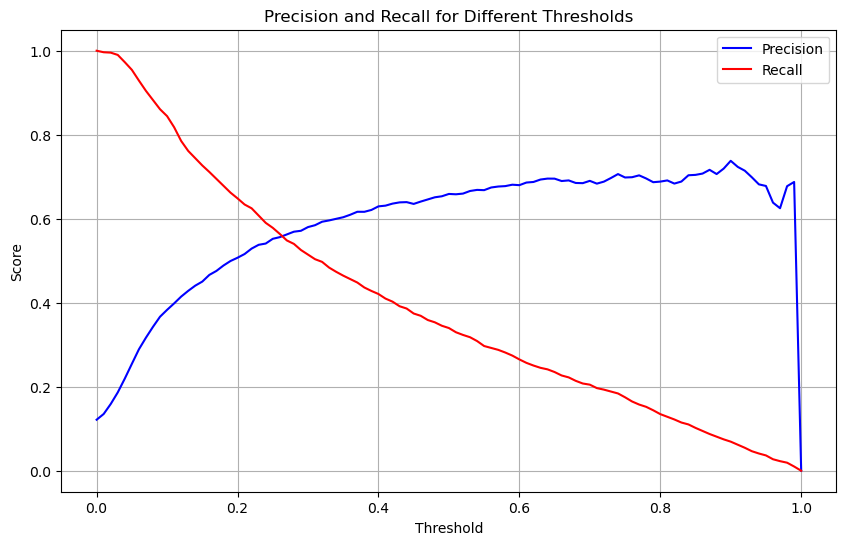

In [21]:
# Plot precision and recall
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision', color='blue')
plt.plot(thresholds, recall_scores, label='Recall', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall for Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()

Question 3: Precision and Recall

At which threshold precision and recall curves intersect?

 - **0.265**
 - 0.465
 - 0.665
 - 0.865

## Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$\displaystyle\ F 1 = 2 ⋅ P ⋅ R P + R$


Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [22]:
thresholds = np.arange(0.0, 1.01, 0.01)
precision_scores = []
recall_scores = []
f1_scores = []

In [23]:
y_val_pred_proba = model.predict_proba(X_val)[:, 1]

In [24]:
for threshold in thresholds:
    y_val_pred = (y_val_pred_proba >= threshold).astype(int)
    precision = precision_score(y_val, y_val_pred, zero_division=0)
    recall = recall_score(y_val, y_val_pred, zero_division=0)
    f1 = f1_score(y_val, y_val_pred, zero_division=0)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

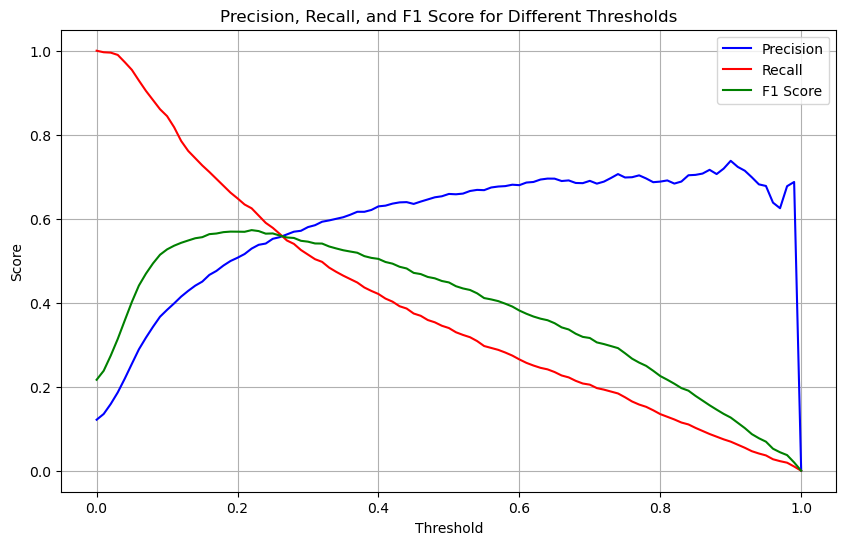

In [25]:
# Plot precision, recall, and F1
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision', color='blue')
plt.plot(thresholds, recall_scores, label='Recall', color='red')
plt.plot(thresholds, f1_scores, label='F1 Score', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score for Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()

At which threshold F1 is maximal?

 - 0.02
 - **0.22**  -  Not exactly what I was expecting but close.
 - 0.42
 - 0.62

Question 5: 5-Fold CV

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

    Iterate over different folds of df_full_train
    Split the data into train and validation
    Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    Use AUC to evaluate the model on validation


In [27]:
#Setup the k-folds

kf = KFold(n_splits=5, shuffle=True, random_state=1)
dv = DictVectorizer(sparse=False)

In [28]:
# Collect AUC scores
auc_scores = []

# Cross-validation
for train_index, val_index in kf.split(df):
    df_train = df.iloc[train_index]
    df_val = df.iloc[val_index]
    
    y_train = df_train['y']
    y_val = df_val['y']
    df_train = df_train.drop(columns=['y'])
    df_val = df_val.drop(columns=['y'])
    
    # One-hot encoding
    X_train = dv.fit_transform(df_train.to_dict(orient='records'))
    X_val = dv.transform(df_val.to_dict(orient='records'))
    
    # Train Logistic Regression
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    
    # Predict and calculate AUC
    y_val_pred_proba = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_val_pred_proba)
    auc_scores.append(auc)

# Print AUC scores for each fold
print(f"AUC scores for each fold: {auc_scores}" )
print(f"Mean AUC: {np.mean(auc_scores)}")
print(f"Std dev: {np.std(auc_scores)}")


AUC scores for each fold: [np.float64(0.9070198328299168), np.float64(0.8974807202730293), np.float64(0.9053329299902487), np.float64(0.9123689165355833), np.float64(0.9060559159870094)]
Mean AUC: 0.9056516631231576
Std dev: 0.004775409930074014


How large is standard deviation of the scores across different folds?

 - 0.0001
 - **0.006**
 - 0.06
 - 0.26

Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter C

    Iterate over the following C values: [0.000001, 0.001, 1]
    Initialize KFold with the same parameters as previously
    Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    Compute the mean score as well as the std (round the mean and std to 3 decimal digits)



In [29]:
C_values = [0.000001, 0.001, 1]

results = []

for C in C_values:
    auc_scores = []
    
    for train_index, val_index in kf.split(df):
        df_train = df.iloc[train_index]
        df_val = df.iloc[val_index]
        
        y_train = df_train['y']
        y_val = df_val['y']
        df_train = df_train.drop(columns=['y'])
        df_val = df_val.drop(columns=['y'])
        
        # One-hot encoding
        X_train = dv.fit_transform(df_train.to_dict(orient='records'))
        X_val = dv.transform(df_val.to_dict(orient='records'))
        
        # Train LR mdole 
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, y_train)
        
        # Predict and calculate AUC
        y_val_pred_proba = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_val_pred_proba)
        auc_scores.append(auc)
    
    # Calculate mean and standard deviation of AUC scores
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    results.append((C, round(mean_auc, 3), round(std_auc, 3)))

# Print results
for C, mean_auc, std_auc in results:
    print(f"C={C}: Mean AUC = {mean_auc}, Std AUC = {std_auc}")


C=1e-06: Mean AUC = 0.705, Std AUC = 0.011
C=0.001: Mean AUC = 0.868, Std AUC = 0.006
C=1: Mean AUC = 0.906, Std AUC = 0.005


Which C leads to the best mean score?

 - 0.000001
 - 0.001
 - **1**

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.